## AutoEncoder for MNIST Digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from autoencoder import SparseAutoEncoder, SimpleAutoEncoder
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
train = pd.read_csv('dataset/MNIST_train.csv')
test = pd.read_csv('dataset/MNIST_test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print "train.shape = %s , test.shape = %s"%(train.shape,test.shape)

train.shape = (42000, 785) , test.shape = (28000, 784)


In [5]:
X = train.drop('label',axis=1).values
X = np.vstack((X,test.values))
X = X/255.0
X.shape

(70000, 784)

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_val = train_test_split(X, test_size=0.3)

### Training a Simple AutoEncoder

In [9]:
input_size=784
hiddenSize=32
simple_encoder = SimpleAutoEncoder(inputSize=input_size, hiddenSize=hiddenSize)

In [10]:
simple_encoder.train(X=X_train, y=X_train, learning_rate=3e-4, reg=9e-5, opt='rmsprop', n_iters=10001)

Iteration 0, loss = 0.879496
Iteration 500, loss = 0.25299
Iteration 1000, loss = 0.214121
Iteration 1500, loss = 0.203232
Iteration 2000, loss = 0.195116
Iteration 2500, loss = 0.183186
Iteration 3000, loss = 0.183928
Iteration 3500, loss = 0.178928
Iteration 4000, loss = 0.175714
Iteration 4500, loss = 0.178347
Iteration 5000, loss = 0.180642
Iteration 5500, loss = 0.177322
Iteration 6000, loss = 0.174895
Iteration 6500, loss = 0.179068
Iteration 7000, loss = 0.17897
Iteration 7500, loss = 0.176633
Iteration 8000, loss = 0.178763
Iteration 8500, loss = 0.184751
Iteration 9000, loss = 0.18386
Iteration 9500, loss = 0.183128
Iteration 10000, loss = 0.184938


In [11]:
simple_encoder.getloss(X_val,X_val)

0.18293370489833913

### Loss function for Simple Encoder

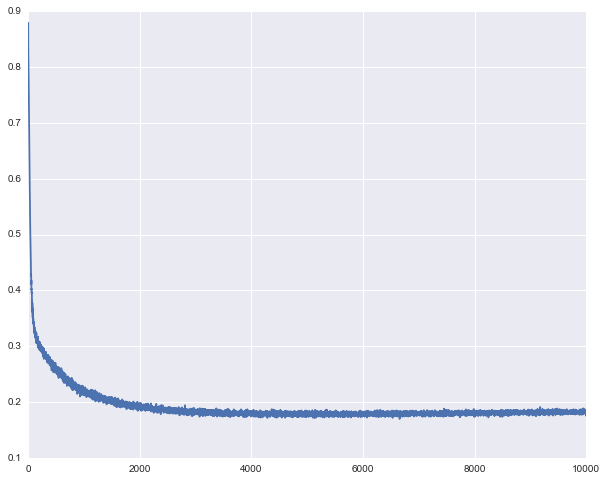

In [12]:
plt.plot(simple_encoder.loss_history)

In [14]:
# After Hyper-Parameter Tuning Training on full dataset
simple_encoder.train(X=X, y=X, learning_rate=3e-4, reg=9e-5, opt='rmsprop', n_iters=10001)

Iteration 0, loss = 0.183787
Iteration 500, loss = 0.187446
Iteration 1000, loss = 0.181808
Iteration 1500, loss = 0.179499
Iteration 2000, loss = 0.184051
Iteration 2500, loss = 0.18916
Iteration 3000, loss = 0.188498
Iteration 3500, loss = 0.187412
Iteration 4000, loss = 0.186167
Iteration 4500, loss = 0.18503
Iteration 5000, loss = 0.184692
Iteration 5500, loss = 0.184731
Iteration 6000, loss = 0.187139
Iteration 6500, loss = 0.19077
Iteration 7000, loss = 0.19408
Iteration 7500, loss = 0.193734
Iteration 8000, loss = 0.188706
Iteration 8500, loss = 0.188913
Iteration 9000, loss = 0.190357
Iteration 9500, loss = 0.185433
Iteration 10000, loss = 0.190507


## Orignal Image Vs Reconstructed Image by Simple AutoEncoder

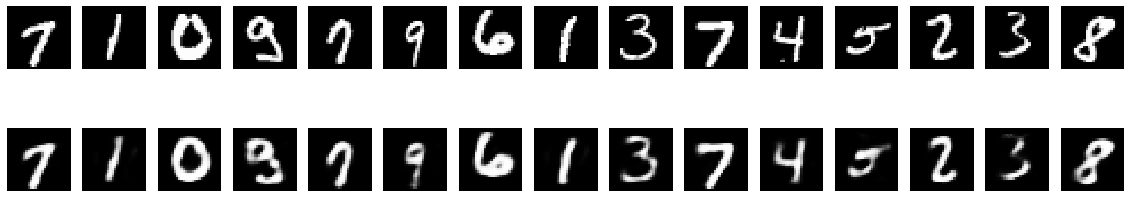

In [15]:
plt.figure(figsize=(20, 4))
n = 15
ids = np.random.choice(X.shape[0], n)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[ids[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    recon_image = simple_encoder.predict(X[ids[i]])
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Training a Sparse AutoEncoder

In [16]:
input_size=784
hiddenSize=32
sparse_encoder = SparseAutoEncoder(inputSize=input_size, hiddenSize=hiddenSize)

In [17]:
sparse_encoder.train(X=X_train, y=X_train, learning_rate=4e-3, reg=3e-3, opt='adam', n_iters=10001)

Iteration 0, loss = 0.879978
Iteration 500, loss = 0.150599
Iteration 1000, loss = 0.135739
Iteration 1500, loss = 0.130231
Iteration 2000, loss = 0.12748
Iteration 2500, loss = 0.126246
Iteration 3000, loss = 0.125274
Iteration 3500, loss = 0.132002
Iteration 4000, loss = 0.126773
Iteration 4500, loss = 0.127073
Iteration 5000, loss = 0.12168
Iteration 5500, loss = 0.122773
Iteration 6000, loss = 0.119182
Iteration 6500, loss = 0.122462
Iteration 7000, loss = 0.121235
Iteration 7500, loss = 0.12724
Iteration 8000, loss = 0.121941
Iteration 8500, loss = 0.126151
Iteration 9000, loss = 0.124469
Iteration 9500, loss = 0.123503
Iteration 10000, loss = 0.124577


In [18]:
print sparse_encoder.getloss(X_val, X_val)

0.123999081631


### Loss function for Sparse Encoder

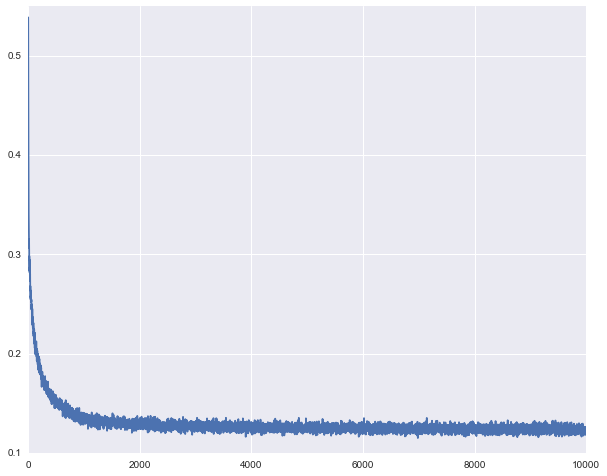

In [22]:
plt.plot(sparse_encoder.loss_history[10:])

In [23]:
# After Hyper-parameter tuning training on full data set
sparse_encoder.train(X=X, y=X, learning_rate=4e-3, reg=3e-3, opt='adam', n_iters=10001)

Iteration 0, loss = 0.128929
Iteration 500, loss = 0.122807
Iteration 1000, loss = 0.12435
Iteration 1500, loss = 0.126579
Iteration 2000, loss = 0.123875
Iteration 2500, loss = 0.118183
Iteration 3000, loss = 0.126516
Iteration 3500, loss = 0.121786
Iteration 4000, loss = 0.12201
Iteration 4500, loss = 0.121795
Iteration 5000, loss = 0.122165
Iteration 5500, loss = 0.123578
Iteration 6000, loss = 0.12489
Iteration 6500, loss = 0.124298
Iteration 7000, loss = 0.123054
Iteration 7500, loss = 0.125686
Iteration 8000, loss = 0.125508
Iteration 8500, loss = 0.120211
Iteration 9000, loss = 0.126209
Iteration 9500, loss = 0.125861
Iteration 10000, loss = 0.122992


## Orignal Vs Reconstructed Image by Sparse AutoEncoder

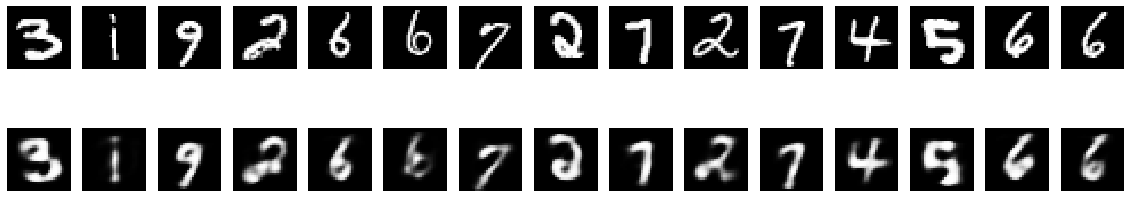

In [29]:
plt.figure(figsize=(20, 4))
n = 15
ids = np.random.choice(X.shape[0], n)
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[ids[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    recon_image = sparse_encoder.predict(X[ids[i]])
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(recon_image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()